In [ ]:
from Global import *            # Global vairables (symbolic)
from CircuitSetUp import CircuitSetUp
from Experiment import SymbolixExperimentCG
from Utils import seriesZ, parallelZ, simplify_array
import pickle

# Loading test Runs

In [ ]:
file = "../Runs/TIA_simple/simple_Z1_Z2_ZL_object"  # Ensure full file path
try:
    with open(file, 'rb') as f:
        experiment = pickle.load(f)
    print("Object loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file}")
except pickle.UnpicklingError:
    print(f"Error unpickling file: {file}")


# Automated Test Bench
transmissionMatrix =
    - "simple"          : 
    - "symbolic"        : 
    - "some_parasitic"  : 
    - "full_parasitic"  :

In [ ]:
_output = [Vop, Von]
_input  = [Iip, Iin]
T_type  = "simple"
experimentName = "TIA"
experimentName += "_" + T_type

circuit = CircuitSetUp(_output, _input,
                              transmissionMatrixType=T_type)
circuit.solve()

impedanceKeys = [
            "Z1_ZL",
            "Z2_ZL",
            "Z3_ZL",
            "Z4_ZL",
            "Z5_ZL",
            "Z1_Z2_ZL",
            "Z1_Z3_ZL",
            "Z1_Z4_ZL",
            "Z1_Z5_ZL",
            "Z2_Z3_ZL",
            "Z2_Z4_ZL",
            "Z2_Z5_ZL",
            "Z3_Z4_ZL",
            "Z3_Z5_ZL",
            "Z4_Z5_ZL"
            ]

impedanceKeys = impedanceKeys[0:2]
# impedanceKeys = ["Z1"]

for i, key in enumerate(impedanceKeys, 1):
    print(f"==> Running the {experimentName} Experiment for {key} ({i}/{len(impedanceKeys)})\n")
    experiment = SymbolixExperimentCG(experimentName, circuit)
    experiment.computeTFs(comboKey=key)
    #
    experiment.classifier.classifyBiQuadFilters()
    experiment.classifier.summarizeFilterType()

    experiment.reportSummary(experimentName, key)
    experiment.compilePDF()

print(impedanceKeys)
experiment.classifier.impedanceList

In [ ]:
ZL_RLC = [RL, LL, CL]
ZL_C = 1/(s*CL)
ZzL = [ RL,                                            # R
        1/(s*CL),                                      # C
        parallelZ([RL, 1/(s*CL)]),                              # R || C
        seriesZ([RL, CL]),                                 # R + C
        seriesZ([s*LL + 1/(s*CL)]),                             # L + C
        (LL*s)/(1 + LL*CL*s**2),                       # L || C
        RL + s*LL + 1/(s*CL),                          # R + L + C
        (1/RL + s*CL+ 1/(s*LL))**-1,                   # R || L || C
        RL + (s*LL/(1 + LL*CL*s**2)),                  # R + (L || C)
        RL*(s*LL + 1/(s*CL))/(RL + (s*LL + 1/(s*CL)))  # R || (L + C)
    ]
ZzL = simplify_array(ZzL)

ZzL

In [ ]:
cluster = {"TEST" : experiment.classifier.clusteredByType["BP"][0:2]}
experiment.fileSave.generateSummaryTable(experiment.classifier.clusteredByType, "Tables")
experiment.compilePDF()

In [ ]:
seriesZ([ parallelZ([R1, s*L1]), R1])

# Manual Experiment

In [ ]:
from Global import *            # Global vairables (symbolic)
from CircuitSetUp import CircuitSetUp
from Experiment import SymbolixExperimentCG
from Utils import FileSave
import pickle

_output = [Vop, Von]
_input  = [Iip, Iin]
T_type  = "simple"
experimentName = "TIA"
experimentName += "_" + T_type

circuit = CircuitSetUp(_output, _input,
                              transmissionMatrixType=T_type)
circuit.solve()

# tf = circuit.baseHs
# circuit.baseHsDict

# Testing

Original Expression: R + (R | L)
1 - After Replacing Symbols: self.zDictionary['R'] + (self.zDictionary['R'] | self.zDictionary['L'])
 2 - After Parsing Parentheses: self.zDictionary['R'] + self.parallel *START* [self.zDictionary['R'] ,  self.zDictionary['L']] *END*
Final Parsed Expression: self.series*START* [self.zDictionary['R'] ,  self.parallel *START* [self.zDictionary['R'] ,  self.zDictionary['L']] *END*] *END*


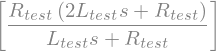

In [2]:
from Utils import Impedance

# Initialize the Impedance object
impedance = Impedance("test")

# Reset allowedConnections
impedance.allowedConnections = []
# Test Case 1: Simple series connection
impedance.setAllowedImpedanceConnections(["R + (R | L)"])

impedance.allowedConnections

In [ ]:
self.series([self.zDictionary['R'] ,  self.parallel[self.zDictionary['C'] ,  self.zDictionary['L']]])

self.series([self.zDictionary['R'] ,  self.parallel[self.zDictionary['C'] ,  self.series[self.zDictionary['L'], self.zDictionary['R']]]])

self.series([self.zDictionary['R'] ,  self.seriesself.parallel[[self.zDictionary['C'] ,  self.zDictionary['L'] ,  self.zDictionary['R']]]])


In [ ]:
import sympy



def test_setAllowedImpedanceConnections():
    # Reset allowedConnections
    impedance.allowedConnections = []

    # Test Case 1: Simple series connection
    impedance.setAllowedImpedanceConnections(["R + L"])
    expected = impedance.series([impedance.Z_R, impedance.Z_L])
    assert simplify(impedance.allowedConnections[0] - expected) == 0, "Failed: R + L"

    # Test Case 2: Simple parallel connection
    impedance.allowedConnections = []  # Reset
    impedance.setAllowedImpedanceConnections(["R | L"])
    expected = impedance.parallel([impedance.Z_R, impedance.Z_L])
    assert simplify(impedance.allowedConnections[0] - expected) == 0, "Failed: R | L"

    # Test Case 3: Nested series and parallel connection
    impedance.allowedConnections = []  # Reset
    impedance.setAllowedImpedanceConnections(["R + (L | C)"])
    expected = impedance.series([impedance.Z_R, impedance.parallel([impedance.Z_L, impedance.Z_C])])
    assert simplify(impedance.allowedConnections[0] - expected) == 0, "Failed: R + (L | C)"

    # Test Case 4: Complex nested expression
    impedance.allowedConnections = []  # Reset
    impedance.setAllowedImpedanceConnections(["(R | L) + (L | C)"])
    expected = impedance.series([
        impedance.parallel([impedance.Z_R, impedance.Z_L]),
        impedance.parallel([impedance.Z_L, impedance.Z_C])
    ])
    assert simplify(impedance.allowedConnections[0] - expected) == 0, "Failed: (R | L) + (L | C)"

    print("All test cases passed!")

# Run the refined tests
test_setAllowedImpedanceConnections()

